<a href="https://colab.research.google.com/github/ashishkumarsaklani/Jam-project/blob/main/Jamboree_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing and Reading Data

In [4]:

url ='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'

df = pd.read_csv(url)

df = df.drop('Serial No.',axis=1)

#checking data
df.head().style.set_properties(**{'background':'black','border': '1.5px solid blue','color': 'red'})

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0,0.650000


#Shape

In [5]:
df.shape

(500, 8)

#Data Types

In [17]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

#Null values

No null values present


In [7]:
print(df.isnull().sum())


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


#Duplicate values


In [15]:
duplicate = df.duplicated( )
duplicate.sum()

0

#Unique Values

In [18]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

#Summary

In [6]:
print(df.describe())

        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.5600

#Distribution of Data

data is normally distributed on most columns Research is binary

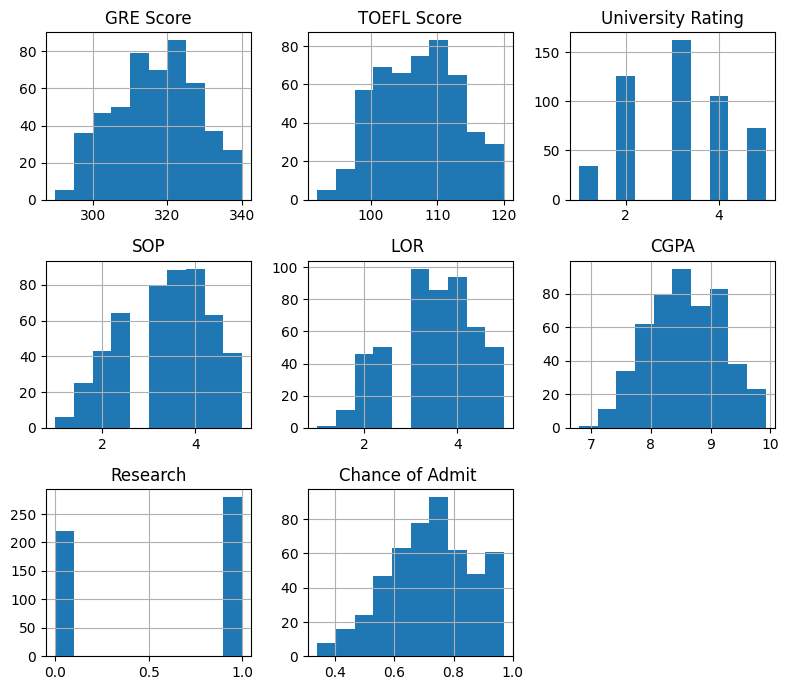

In [8]:
df.hist(figsize=(8, 7))
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

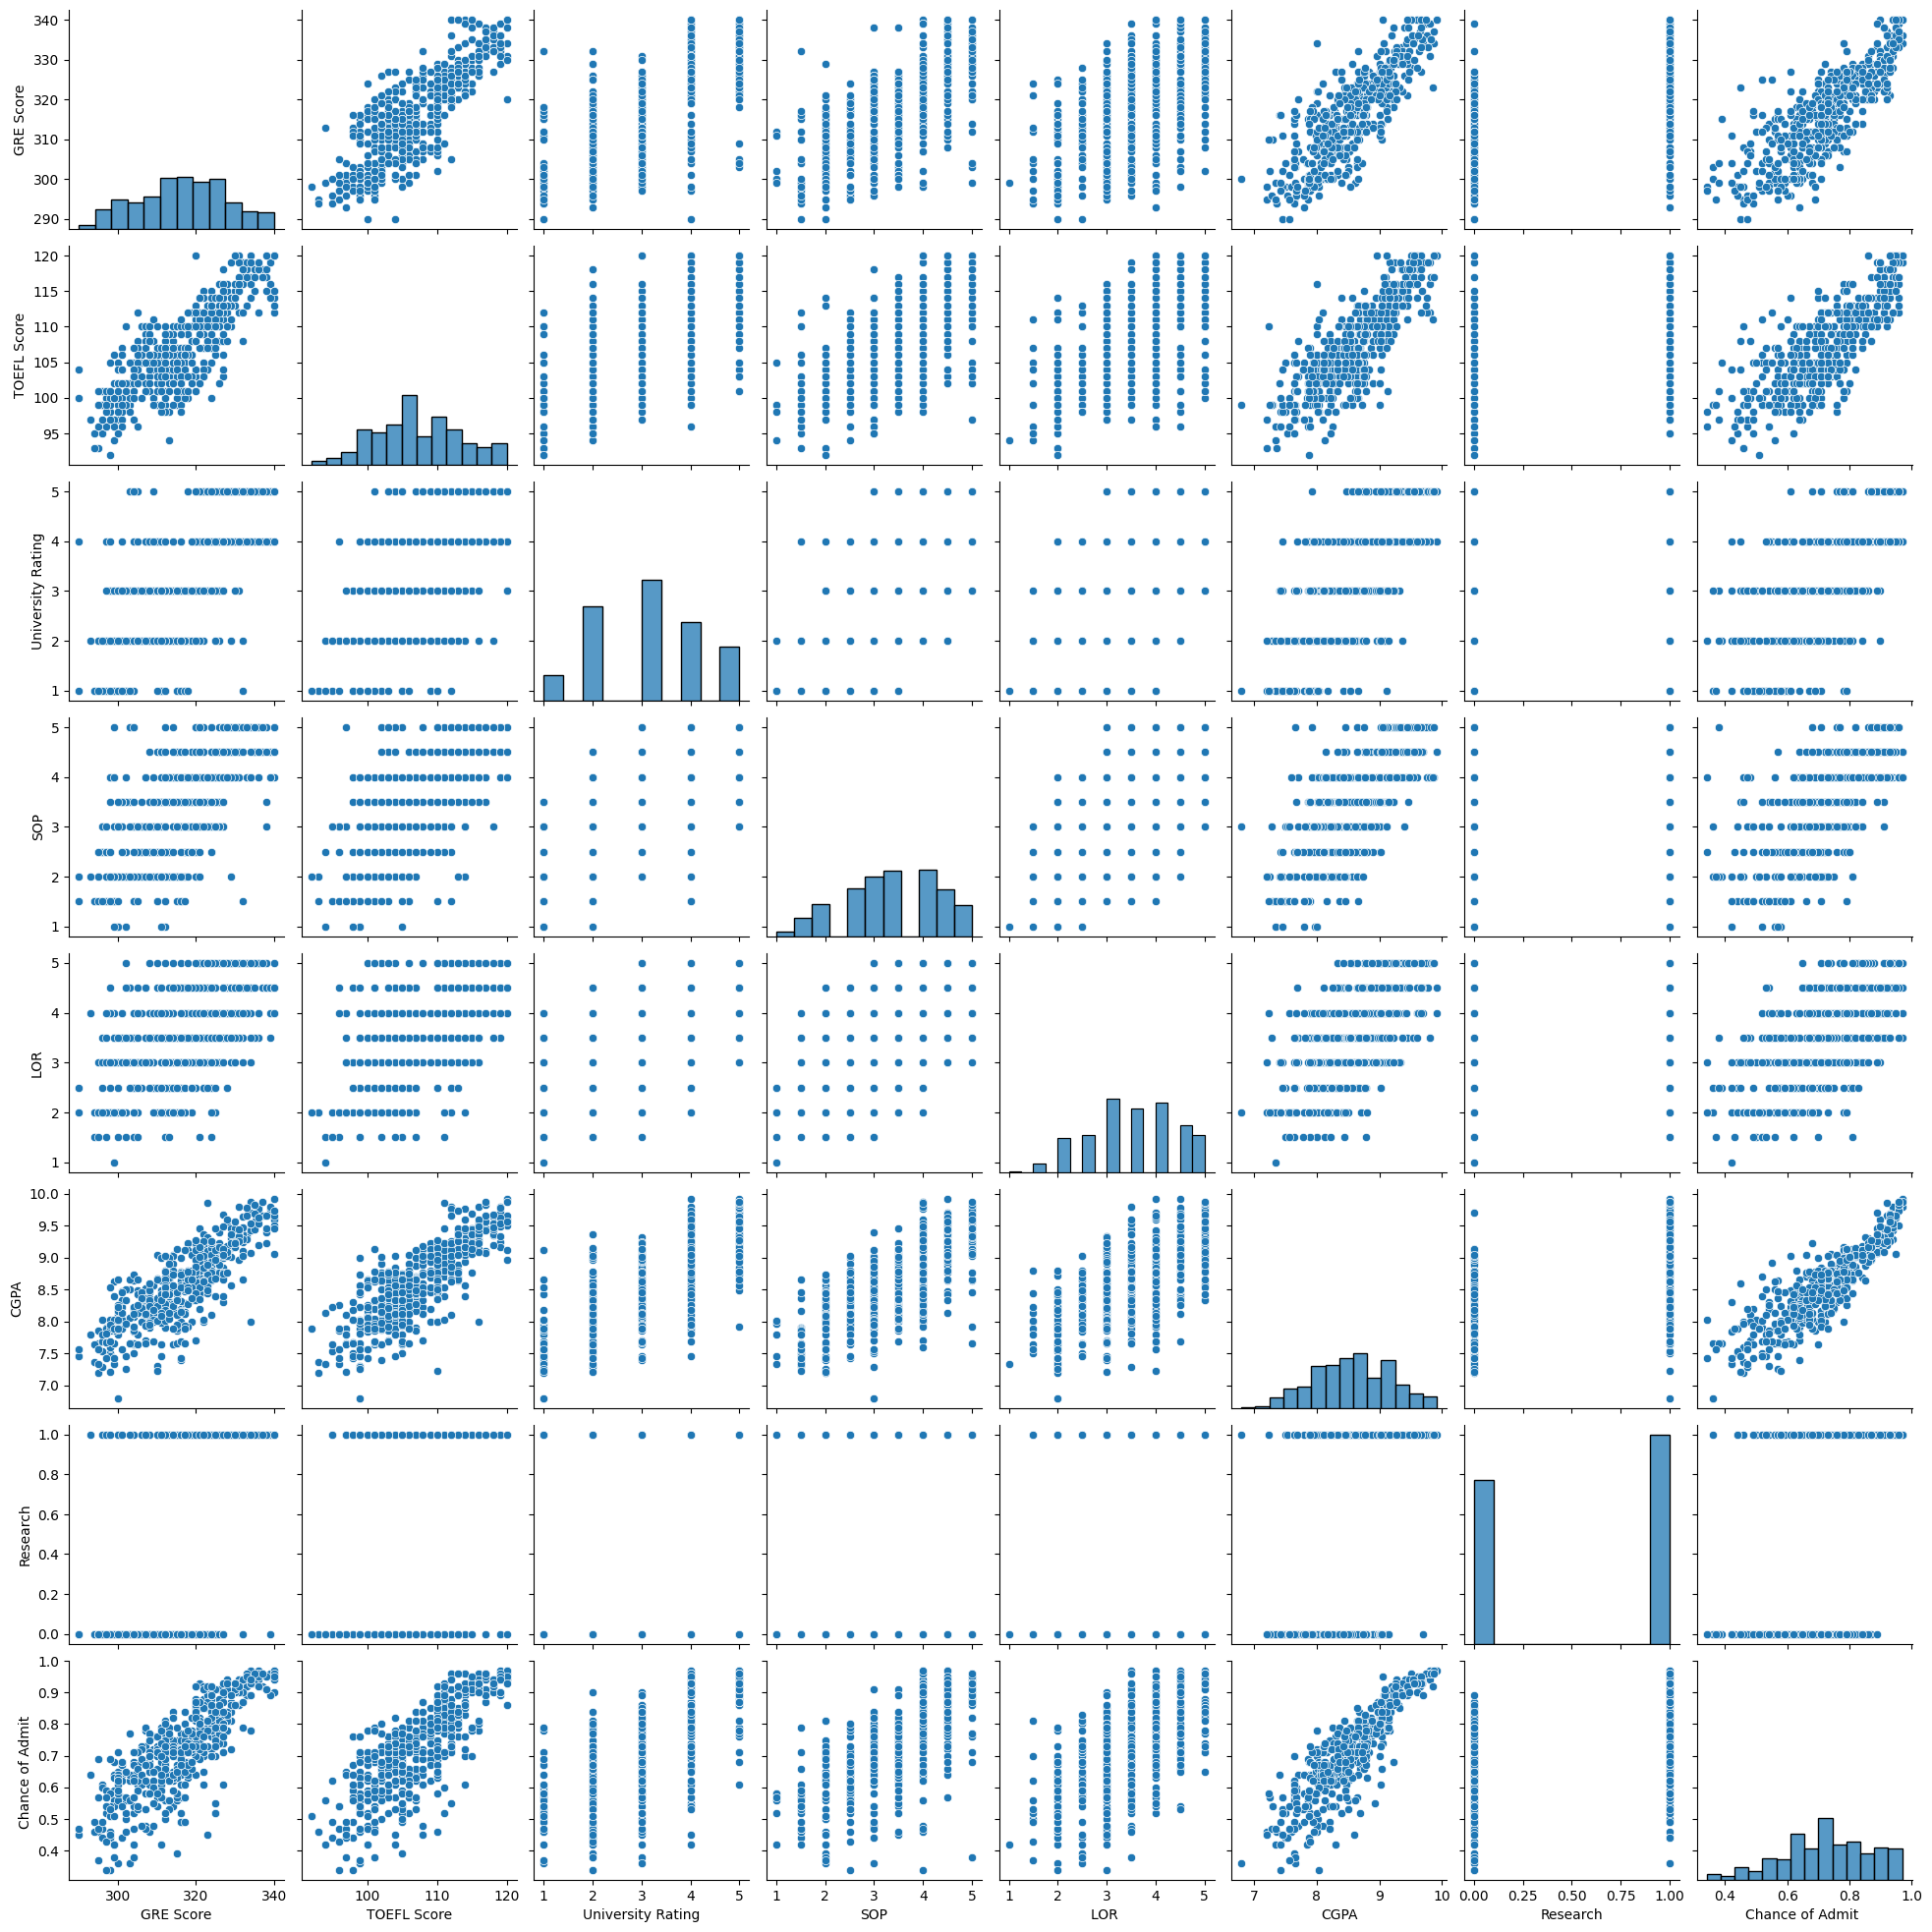

In [9]:
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.show()


#Finding Outliers


checking details dont see any outliers in data

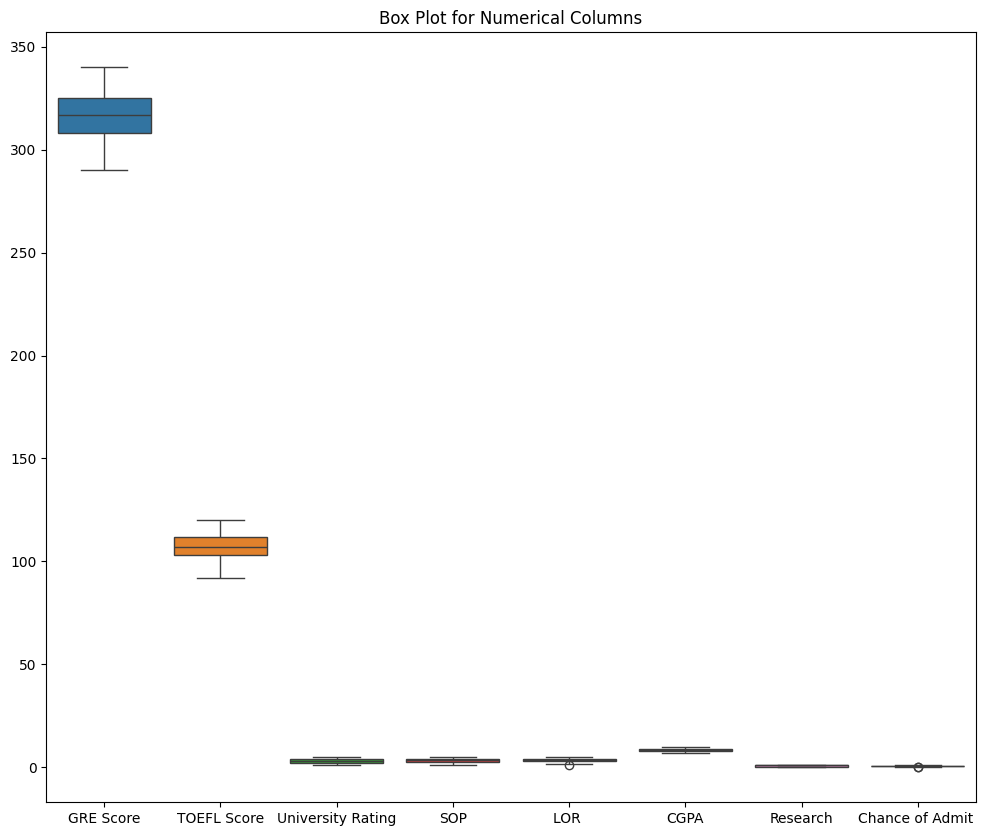

In [10]:

plt.figure(figsize=(12, 10))
sns.boxplot(data=df, orient='v')
plt.title('Box Plot for Numerical Columns')
plt.show()

In [11]:

from scipy.stats import zscore

# Calculate Z-scores for each column
z_scores = np.abs(zscore(df.drop('Chance of Admit ', axis=1)))

# Define a threshold for outliers (e.g., Z-score greater than 3)
outliers = (z_scores > 3).all(axis=1)

# Display rows with outliers
outliers_df = df[outliers]
print(outliers_df)

Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


#Correlation Matrix  

shows Chances of Admit  are highly related to  CGPA TOFEL and GRE scores

In [16]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


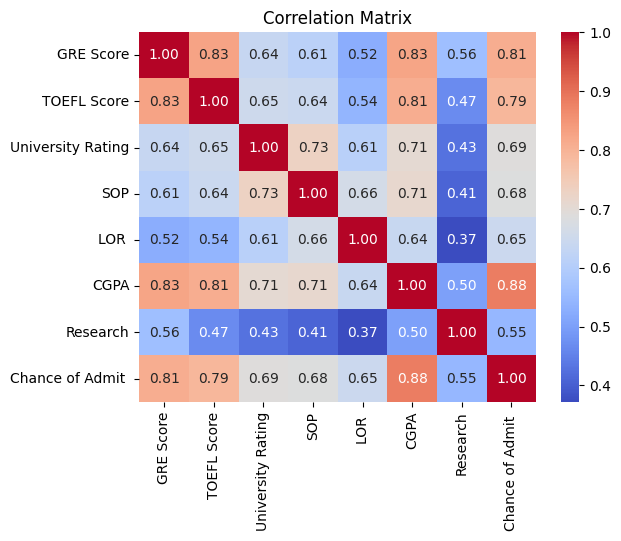

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
